In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import nltk
import re

import string
from nltk.corpus import stopwords
from collections import Counter

In [2]:
np.random.seed(27)

In [3]:
#Setting up parameters for visualization
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('Reds')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [4]:
raw_data = pd.read_csv('train.csv')

In [5]:
print(raw_data.shape)

(1306122, 3)


In [6]:
raw_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


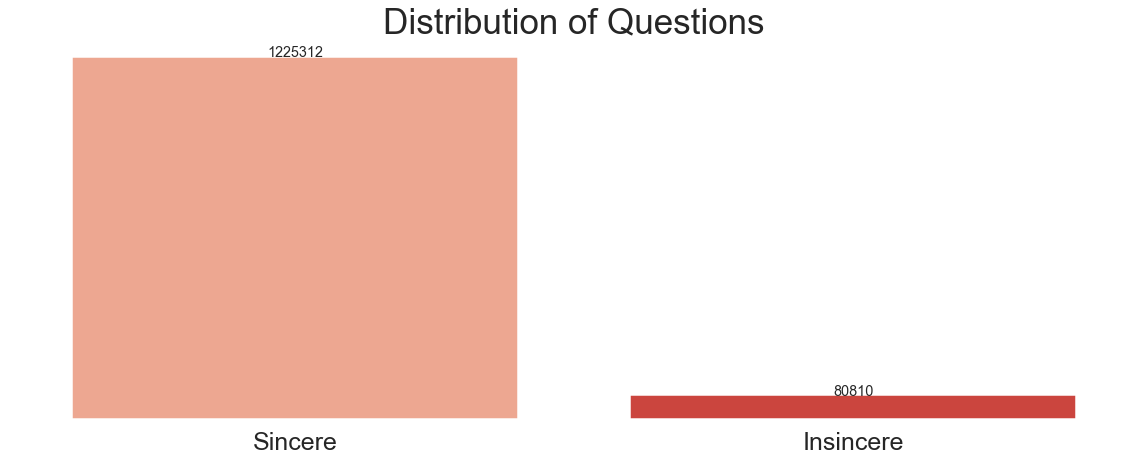

In [11]:
#Generating plot to determine the distribution of data

fig, ax = plt.subplots()
g = sns.countplot(raw_data.target, palette='Reds')
g.set_xticklabels(['Sincere', 'Insincere'])
g.set_yticklabels([])

def value_bars(axs):
    def single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            single_plot(ax)
    else:
        single_plot(axs)
value_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Questions', fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=25)
plt.show()

In [11]:
(len(raw_data.loc[raw_data.target==1])) / (len(raw_data.loc[raw_data.target == 0])) * 100

6.595054973753624

In [12]:
import random
index = random.sample(raw_data.index[raw_data.target == 1].tolist(), 5)
for i in index:
    print(raw_data.iloc[i, 1])

Why do men collect women's underwear?
Are Democrats really "baby killers" or is this just propaganda from treasonous, pedophile, porn star backing Republicans who want your vote so they can give even more tax cuts to their wealthy donors?
How can I raise my child to be a Machiavellian?
Why do evolutionists ignore the fossil record?
Why are Indian customers such a pain?


In [13]:
df = raw_data.sample(frac=0.3)
df.shape

(391837, 3)

In [14]:
nlp = spacy.load('en')
 
df['tokens'] = [nlp(text, # disabling parts of the language processing pipeline we don't need here to speed up processing
                    disable=['ner',                                               # named entity recognition
                                   'tagger',                                      # part-of-speech tagger
                                   'textcat',                                     # document label categorizer
                                  ]) for text in df.question_text]
df.sample(5)

,qid,question_text,target,tokens
941479,b88471ecd5bdbf4f1348,What are your all time favorite song? Why?,0,"(What, are, your, all, time, favorite, song, ?..."
443764,56f4e0b7929d7b485d4b,Is it perfect time to buy dgb coin?,0,"(Is, it, perfect, time, to, buy, dgb, coin, ?)"
969594,bdfab6a4dc32c4055b05,"Which is more powerful, the Infinity Stones or...",0,"(Which, is, more, powerful, ,, the, Infinity, ..."
64912,0cba563243b48d153b80,Can Randy Bryce actually defeat Paul Ryan?,0,"(Can, Randy, Bryce, actually, defeat, Paul, Ry..."
824777,a1a06aaddeb7ca97fc4f,"What is the difference between cream, body lot...",0,"(What, is, the, difference, between, cream, ,,..."


In [15]:
df['num_tokens'] = [len(token) for token in df.tokens]
df.sample(5)

,qid,question_text,target,tokens,num_tokens
698303,88bd794a3df19ecca758,What are some of the best universities in east...,0,"(What, are, some, of, the, best, universities,...",19
388684,4c24f77c8d9c4a2024b4,How do I make 3D ads for mobile advertising?,0,"(How, do, I, make, 3D, ads, for, mobile, adver...",10
553839,6c84635dcbf2e1e87a82,How did you prepare for JEE Advanced and Mains...,0,"(How, did, you, prepare, for, JEE, Advanced, a...",16
860674,a89f91fe331355072c63,How can I shield a magnet?,0,"(How, can, I, shield, a, magnet, ?)",7
874485,ab530f62aefceff333b2,How prevalent is ageism in medical school admi...,0,"(How, prevalent, is, ageism, in, medical, scho...",9


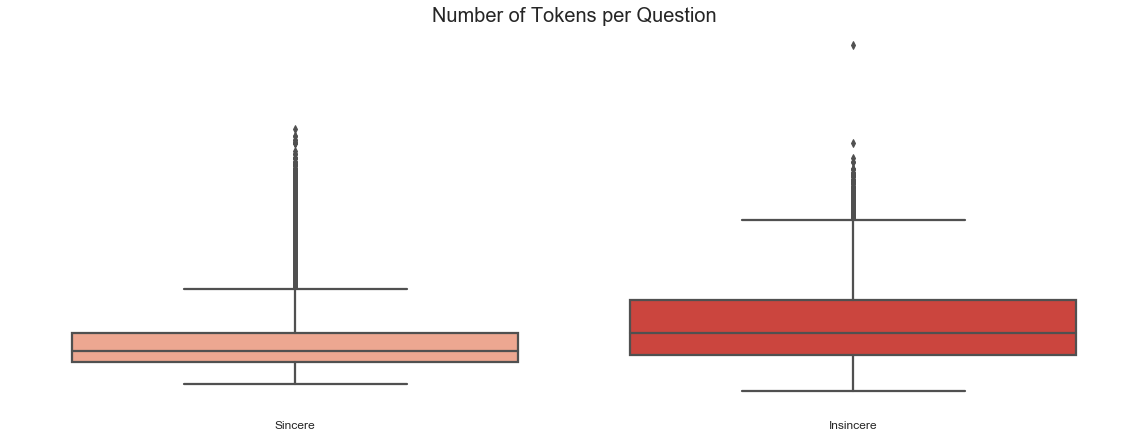

In [16]:
#Generating plots to determine the number of tokens based on the type of questions

fig, ax = plt.subplots()
g = sns.boxplot(x=df.target, y=df.num_tokens, palette='Reds')
g.set_xticklabels(['Sincere', 'Insincere'])
g.set_yticklabels([])

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Tokens per Question', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.show()

In [17]:
print(list(df.iloc[0,3].sents))

sents = [list(x.sents) for x in df.tokens]
df['num_sents'] = [len(sent) for sent in sents]
df.sample(5)

[How should HSEB student prepare for applying to US universities after their grade 12?]


,qid,question_text,target,tokens,num_tokens,num_sents
59100,0b9770135cbd8740ce27,How do I Know my best friend is in love with me?,0,"(How, do, I, Know, my, best, friend, is, in, l...",13,1
456788,597af5a4199dc16d0724,How do women act friendly in the workplace wit...,0,"(How, do, women, act, friendly, in, the, workp...",18,1
604580,76651176cb86033ff39e,What are the commodities exported from India?,0,"(What, are, the, commodities, exported, from, ...",8,1
193332,25cab8833f218080282e,What are some common diseases of reproductive ...,0,"(What, are, some, common, diseases, of, reprod...",9,1
1029705,c9c6b86251fd1de4c8cc,Whatis difference between logical operators an...,0,"(Whatis, difference, between, logical, operato...",9,1


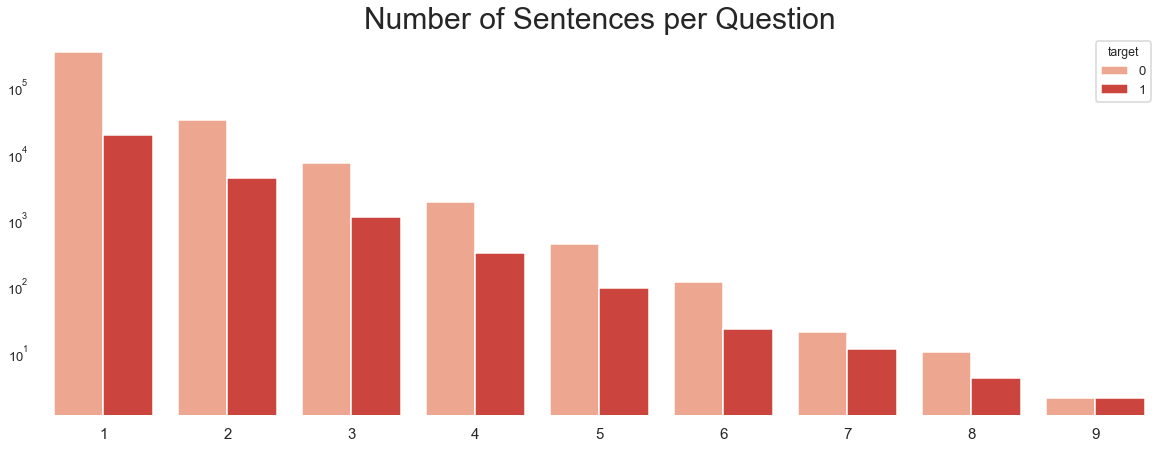

In [18]:
# Plotting number of sentences per question
fig, ax = plt.subplots()
g = sns.countplot(df.num_sents, hue=df.target, palette='Reds')
#g.set_xticklabels(['Sincere', 'Insincere'])
g.set_yticklabels([])

# Using log scale on y-axis so we can better see the questions with more sentences
ax.set(yscale='log')

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Sentences per Question', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('sentences.png')
plt.show()

In [19]:
#Managing Punctuations in the sentences

punctuations = string.punctuation
stop_words = set(stopwords.words("english"))

def cleanup_text(docs):
    texts = []
    for doc in docs:
        doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
        doc = nlp(doc, disable=['ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stop_words and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [20]:
insincere_text = [text for text in df[df['target'] == 1]['question_text']]
insincere_clean = cleanup_text(insincere_text)
insincere_clean = ' '.join(insincere_clean).split()

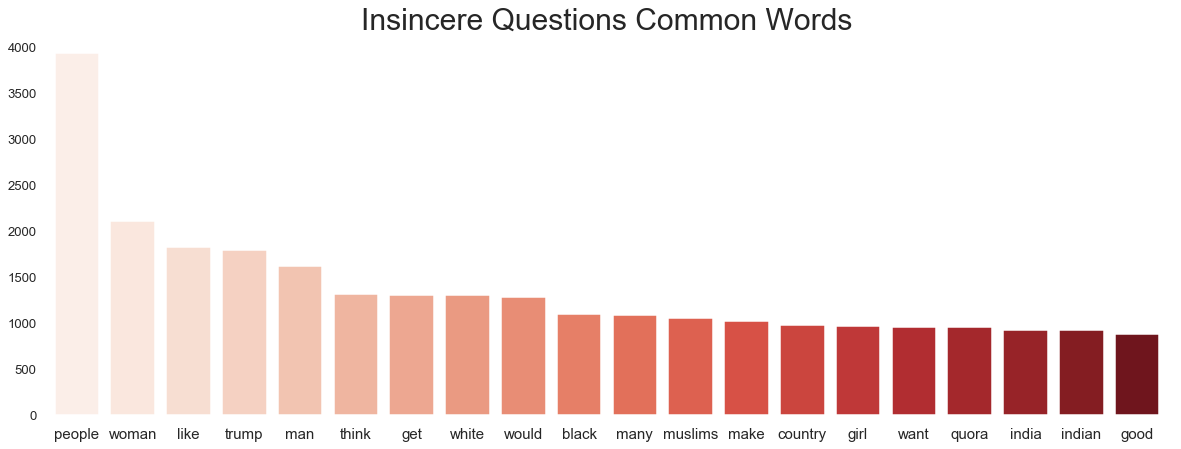

In [22]:
insincere_counts = Counter(insincere_clean)
insincere_common_words = [word[0] for word in insincere_counts.most_common(20)]
insincere_common_counts = [word[1] for word in insincere_counts.most_common(20)]

# Plotting 20 most common words in insincere questions
sns.barplot(insincere_common_words, insincere_common_counts, palette='Reds')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Insincere Questions Common Words', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('insincere_words.png')
plt.show()

In [23]:
sincere_text = [text for text in df[df['target'] == 0]['question_text']]
sincere_clean = cleanup_text(sincere_text)
sincere_clean = ' '.join(sincere_clean).split()

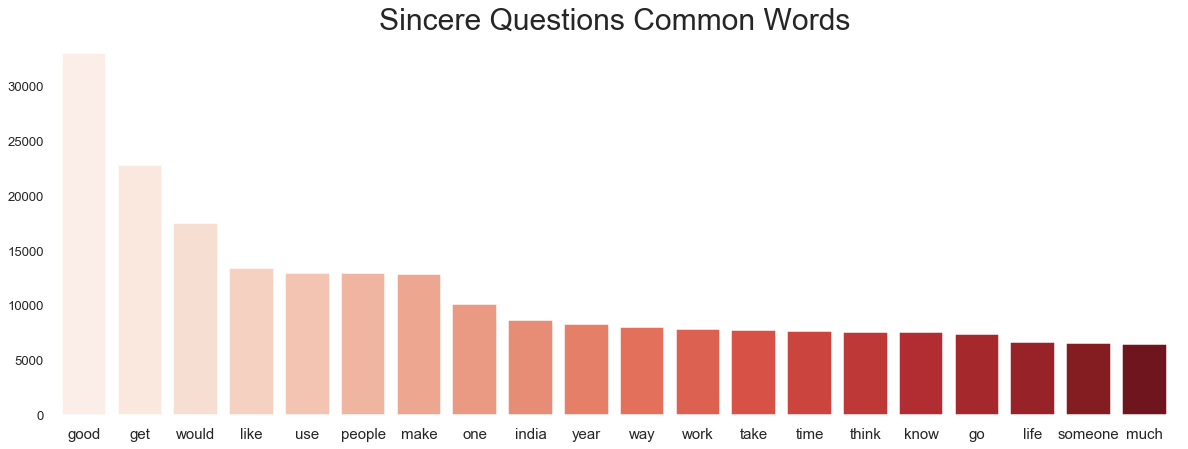

In [24]:
sincere_counts = Counter(sincere_clean)
sincere_common_words = [word[0] for word in sincere_counts.most_common(20)]
sincere_common_counts = [word[1] for word in sincere_counts.most_common(20)]

# Plotting 20 most common words in sincere questions
sns.barplot(sincere_common_words, sincere_common_counts, palette='Reds')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Sincere Questions Common Words', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('sincere.png')
plt.show()